**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

**Importing Dataset**

In [2]:
rdf = pd.read_csv('./Creditcard_data.csv')
print(rdf.shape)
rdf.head()

(772, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
rdf["Class"].unique()

array([0, 1], dtype=int64)

In [4]:
rdf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


**Checking data imbalance**

In [5]:
fraud_df = rdf[rdf["Class"] == 1]
fair_df  = rdf[rdf["Class"] == 0]
print(fraud_df.shape)
print(fair_df.shape)

(9, 31)
(763, 31)


0    763
1      9
Name: Class, dtype: int64


<AxesSubplot: ylabel='Type'>

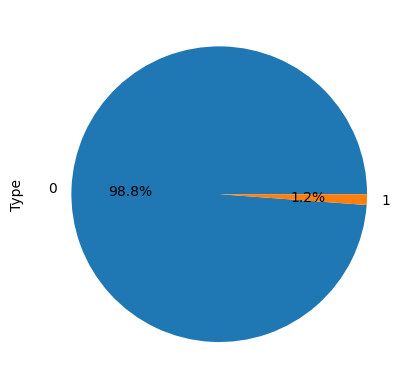

In [6]:
print(rdf["Class"].value_counts())

rdf.groupby('Class').size().plot(kind='pie', y = "Class", label = "Type", autopct='%1.1f%%')

**Resampling the dataset using SMOTE**

In [7]:
x = rdf.drop("Class", axis=1)
y = rdf[['Class']]

In [8]:
from imblearn.over_sampling import SMOTE

su = SMOTE(random_state=42)
X_su, Y_su = su.fit_resample(x, y)

0    763
1    763
Name: Class, dtype: int64


<AxesSubplot: ylabel='Type'>

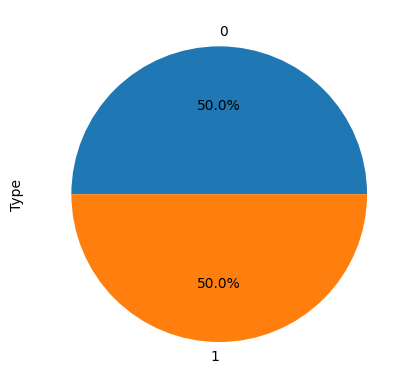

In [9]:
print(Y_su["Class"].value_counts())

Y_su.groupby('Class').size().plot(kind='pie', y = "Class", label = "Type", autopct='%1.1f%%')

**Concatenating to form balanced dataset**

In [10]:
df = pd.DataFrame(X_su)
df['Class'] = Y_su
print(df.shape)
df.head()

(1526, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Scaling amount and time columns**

In [11]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(df[["Time", "Amount"]])
df[["Time", "Amount"]] = scaler.transform(df[["Time", "Amount"]])

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.144410,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.246434,0
1,-1.144410,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000005,1
2,-1.141304,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,13.424764,0
3,-1.141304,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.313767,0
4,-1.138199,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,2.403086,0


In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,...,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000
mean,-0.104212,-0.476209,0.091908,0.769480,0.673627,0.305853,-0.182999,-0.177075,0.120121,-0.188538,...,0.043196,-0.072814,0.004417,-0.102767,-0.001005,0.083706,0.004185,-0.038810,1.741262,0.500000
std,0.545137,1.282471,1.175854,1.003772,1.246164,1.002417,1.018344,0.942655,0.685239,0.882367,...,0.473600,0.560352,0.350791,0.573216,0.448331,0.399154,0.240401,0.220334,5.677642,0.500164
min,-1.144410,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,-0.096047,0.000000
25%,-0.610248,-1.405005,-0.322265,0.267731,0.084919,-0.329608,-0.897522,-0.705147,-0.106199,-0.517364,...,-0.182613,-0.488530,-0.184331,-0.441226,-0.218342,-0.212143,-0.091818,-0.123704,-0.055723,0.000000
50%,0.000000,-0.549520,0.313895,0.762535,0.605094,0.192983,-0.350597,0.049397,0.098612,-0.098880,...,-0.033385,-0.100692,-0.014469,0.016247,0.078975,0.094705,-0.000534,0.004382,0.000000,0.500000
75%,0.389752,0.791839,0.747228,1.458619,1.214750,0.892132,0.202511,0.370830,0.406207,0.268122,...,0.192047,0.297283,0.137796,0.331315,0.258872,0.235449,0.107988,0.046788,0.944277,1.000000
max,0.659938,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,136.591756,1.000000


**Applying different sampling methods**

Random Sampling

In [13]:
random_df = df.sample(n=382, random_state=42)
print(random_df.shape)
random_df.head()

(382, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1439,0.122671,-2.263118,1.896864,-1.490959,3.862543,-0.469374,-1.407899,-2.416175,1.336726,-2.676850,...,0.501235,-0.023823,-0.457858,0.322511,0.056816,0.155428,0.248174,-0.142655,-0.094780,1
76,-0.992236,-0.549626,0.418949,1.729833,0.203065,-0.187012,0.253878,0.500894,0.251256,-0.227985,...,0.115062,0.418529,-0.065133,0.264981,0.003958,0.395969,0.027182,0.043506,2.046016,0
1010,0.038820,-2.068375,1.808796,-1.399115,3.601020,-0.384698,-1.255030,-2.247747,1.263671,-2.499528,...,0.451204,-0.070505,-0.402225,0.148055,-0.102013,0.167370,0.258140,-0.105105,-0.092434,1
660,0.405280,1.255439,0.307729,0.292700,0.699873,-0.428876,-1.088456,0.043840,-0.167739,0.128854,...,-0.294795,-0.882126,0.136846,0.327949,0.194459,0.096516,-0.027271,0.029491,-0.025347,0
1132,0.607143,0.540110,-0.265200,0.782693,0.789618,0.263245,-0.701497,-0.391240,0.009643,0.222441,...,-0.130637,-0.376640,0.165142,0.078787,0.124117,0.263234,-0.044749,-0.013546,-0.048333,1


In [14]:
random_Y_train = random_df["Class"]
random_X_train = random_df.iloc[:,0:30]

Systematic Sampling

In [15]:
indexes = np.arange(0, len(df), step=4)
systematic_df = df.iloc[indexes]
print(systematic_df.shape)
systematic_df.head()

(382, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.144410,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.246434,0
4,-1.138199,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,2.403086,0
8,-1.122671,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,3.231845,0
12,-1.113354,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,4.242353,0
16,-1.107143,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,...,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,0.367787,0


In [16]:
systematic_Y_train = systematic_df["Class"]
systematic_X_train = systematic_df.iloc[:,0:30]

Stratified Sample

In [17]:
df['Amount'].describe()

count    1526.000000
mean        1.741262
std         5.677642
min        -0.096047
25%        -0.055723
50%         0.000000
75%         0.944277
max       136.591756
Name: Amount, dtype: float64

In [18]:
low_percentile = np.percentile(df['Amount'], 25)
normal_percentile = np.percentile(df['Amount'], 75)

In [19]:
AmountGroup = []
for row in df['Amount']:
    if row <= low_percentile :    AmountGroup.append(0)
    elif row > low_percentile and row < normal_percentile :   AmountGroup.append(1)
    elif row >= normal_percentile :  AmountGroup.append(2)

In [20]:
df['AmountGroup'] = AmountGroup
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,AmountGroup
0,-1.144410,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.246434,0,2
1,-1.144410,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000005,1,1
2,-1.141304,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,13.424764,0,2
3,-1.141304,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.313767,0,2
4,-1.138199,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,2.403086,0,2


In [21]:
stratified_df = df.groupby('AmountGroup', group_keys=False).apply(lambda x: x.sample(frac=0.25))
print(stratified_df.shape)
stratified_df.head()

(382, 32)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,AmountGroup
1042,0.010870,-2.026485,1.814520,-1.464999,3.708440,-0.474712,-1.316933,-2.336901,1.285114,-2.565030,...,-0.084272,-0.419016,0.266375,0.054521,0.173604,0.239117,-0.130392,-0.088214,1,0
1508,0.383540,-1.119589,-0.118499,1.870768,0.353622,1.233444,-0.634010,0.345267,0.012137,0.054463,...,0.444584,-0.158722,0.163526,0.282118,-0.219071,-0.108050,-0.133853,-0.057152,1,0
1154,0.340062,-1.021068,0.502571,1.516028,0.438963,0.866391,-0.936307,0.649518,-0.052586,-0.318653,...,0.260121,-0.271888,0.381005,0.367834,-0.411419,-0.079889,-0.126942,-0.062738,1,0
1148,-0.159938,-1.210772,1.457421,-1.019362,2.977458,-0.475649,-1.316531,-1.727101,0.899313,-1.903891,...,-0.281341,-0.282015,0.326136,0.097451,0.152169,0.173298,-0.089497,-0.066388,1,0
1425,-0.069876,-1.801365,1.706213,-1.350879,3.480387,-0.437308,-1.230576,-2.178950,1.201174,-2.403476,...,-0.123052,-0.382621,0.223970,0.062401,0.170267,0.221763,-0.120241,-0.082043,1,0


In [22]:
stratified_Y_train = stratified_df["Class"]
stratified_X_train = stratified_df.iloc[:,0:30]

Cluster Sampling

In [23]:
def clustered_Sample(df, rows_per_cluster, no_of_clusters):
    K = int(len(df)/rows_per_cluster)
    cl_data = None
    for k in range(K):
        sample_cl = df.sample(rows_per_cluster)
        sample_cl["Cluster"] = np.repeat(k,len(sample_cl))
        df = df.drop(index = sample_cl.index)
        cl_data = pd.concat([cl_data,sample_cl],axis = 0)

    random_clusters = np.random.randint(0,K,size = no_of_clusters)
    samples = cl_data[cl_data.Cluster.isin(random_clusters)]
    return(samples)

clustered_df = clustered_Sample(df = df, rows_per_cluster = 96, no_of_clusters = 4)
print(clustered_df.shape)
clustered_df.head()

(384, 33)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,AmountGroup,Cluster
677,0.445652,-0.656147,0.501881,1.532601,-1.319886,-0.186189,-0.897731,1.191646,-0.191943,-0.211756,...,0.112819,0.526267,-0.406443,0.597938,0.046437,-0.055101,2.760513,0,2,4
1068,-0.172360,-0.395477,0.479469,1.055554,0.146667,0.890110,-0.288149,0.569156,0.000860,-0.131978,...,-0.040485,-0.544865,-0.555535,-0.172407,0.074331,0.063510,-0.060530,1,0,4
490,-0.029503,1.261597,0.256346,0.513254,0.619054,-0.472482,-0.989342,0.065431,-0.208781,0.035924,...,0.135646,0.376418,0.220320,0.094706,-0.028559,0.019023,-0.049985,0,1,4
1323,0.240683,-0.704191,0.393281,1.593578,0.235026,0.829171,-0.918363,0.797761,-0.161333,-0.123936,...,-0.218371,0.380670,0.373151,-0.397591,-0.096131,-0.109698,-0.054151,1,1,4
1247,0.240683,-1.593944,1.145667,0.129102,2.018036,0.250290,-1.153822,-0.764485,0.588213,-1.406335,...,-0.357664,0.354026,0.224382,-0.149970,0.071425,-0.134189,-0.077517,1,0,4


In [24]:
clustered_Y_train = clustered_df["Class"]
clustered_X_train = clustered_df.iloc[:,0:30]

Weighted Sampling

In [25]:
df['weights'] = df['AmountGroup'].map({0: 20, 1: 60, 2: 20})
weighted_df = df.sample(n=382, weights='weights')
print(weighted_df.shape)
weighted_df.head()

(382, 33)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,AmountGroup,weights
22,-1.088509,1.166616,0.502120,-0.067300,2.261569,0.428804,0.089474,0.241147,0.138082,-0.989162,...,-0.103855,-0.370415,0.603200,0.108556,-0.040521,-0.011418,-0.014635,0,1,60
195,-0.746894,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,...,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,0.218175,0,1,60
398,-0.250000,1.268069,0.285832,-0.147276,1.047742,0.672115,0.656656,0.138315,-0.010785,0.158271,...,-0.251549,-1.266236,0.901899,-0.230845,0.048271,0.004764,0.137477,0,1,60
46,-1.038820,-0.291540,0.445575,1.249752,-1.735736,0.085756,-0.121924,0.407716,0.095309,0.815902,...,-0.156526,-0.800213,-0.000620,-0.835203,0.131001,0.062896,0.580601,0,1,60
1203,0.135093,-2.204589,1.831160,-1.349260,3.701213,-0.406428,-1.385676,-2.271710,1.271257,-2.565724,...,-0.449095,0.325267,0.071472,0.128716,0.232715,-0.141914,-0.093270,1,0,20


In [26]:
weighted_Y_train = weighted_df["Class"]
weighted_X_train = weighted_df.iloc[:,0:30]

**Applying different machine learning algorithms**

Creating dictionary containing five ML models

In [27]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [29]:
X_test = df.iloc[:,0:30]
Y_test = Y_su

Applying five ML models on random sample

In [30]:
random_accuracy, random_precision, random_recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(random_X_train, random_Y_train)
    
    # Make predictions
    random_predictions = models[key].predict(X_test)
    
    # Calculate evaluation metrics
    random_accuracy[key] = accuracy_score(random_predictions, Y_test)
    random_precision[key] = precision_score(random_predictions, Y_test)
    random_recall[key] = recall_score(random_predictions, Y_test)

Applying five ML models on systematic sample

In [31]:
systematic_accuracy, systematic_precision, systematic_recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(systematic_X_train, systematic_Y_train)
    
    # Make predictions
    systematic_predictions = models[key].predict(X_test)
    
    # Calculate evaluation metrics
    systematic_accuracy[key] = accuracy_score(systematic_predictions, Y_test)
    systematic_precision[key] = precision_score(systematic_predictions, Y_test)
    systematic_recall[key] = recall_score(systematic_predictions, Y_test)

Applying five ML models on stratified sample

In [32]:
stratified_accuracy, stratified_precision, stratified_recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(stratified_X_train, stratified_Y_train)
    
    # Make predictions
    stratified_predictions = models[key].predict(X_test)
    
    # Calculate evaluation metrics
    stratified_accuracy[key] = accuracy_score(stratified_predictions, Y_test)
    stratified_precision[key] = precision_score(stratified_predictions, Y_test)
    stratified_recall[key] = recall_score(stratified_predictions, Y_test)

Applying five ML models on clustered sample

In [33]:
clustered_accuracy, clustered_precision, clustered_recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(clustered_X_train, clustered_Y_train)
    
    # Make predictions
    clustered_predictions = models[key].predict(X_test)
    
    # Calculate evaluation metrics
    clustered_accuracy[key] = accuracy_score(clustered_predictions, Y_test)
    clustered_precision[key] = precision_score(clustered_predictions, Y_test)
    clustered_recall[key] = recall_score(clustered_predictions, Y_test)

Applying five ML models on weighted sample

In [34]:
weighted_accuracy, weighted_precision, weighted_recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(weighted_X_train, weighted_Y_train)
    
    # Make predictions
    weighted_predictions = models[key].predict(X_test)
    
    # Calculate evaluation metrics
    weighted_accuracy[key] = accuracy_score(weighted_predictions, Y_test)
    weighted_precision[key] = precision_score(weighted_predictions, Y_test)
    weighted_recall[key] = recall_score(weighted_predictions, Y_test)

In [35]:
accuracy_table = pd.DataFrame()
accuracy_table['Random Sampling'] = random_accuracy
accuracy_table['Systematic Sampling'] = systematic_accuracy
accuracy_table['Stratified Sampling'] = stratified_accuracy
accuracy_table['Clustered Sampling'] = clustered_accuracy
accuracy_table['Weighted Sampling'] = weighted_accuracy

In [36]:
accuracy_table

,Random Sampling,Systematic Sampling,Stratified Sampling,Clustered Sampling,Weighted Sampling
Logistic Regression,0.916776,0.932503,0.908257,0.919397,0.927261
Decision Trees,0.961992,0.958060,0.963303,0.958716,0.956094
Random Forest,0.994758,0.994758,0.995413,0.988860,0.988204
Naive Bayes,0.872870,0.779817,0.769987,0.831586,0.714941
K-Nearest Neighbor,0.899083,0.904325,0.899083,0.905636,0.896461
